In [304]:
import pandas as pd
import os

os.chdir('/home/hasan/statistikaamet/RealEstateProject/')
#xl_file = pd.ExcelFile()
dfs = pd.read_excel('preprocessed_data2.xlsx', sheet_name='Sheet1',index_col=0)
dfs

,date,name,rooms,totalarea,landarea,price,pricesqm,numoffloor,geoloc,builtyear,energymark,condition,link
0,2020-03-21,"Müüa äripind, ladu, tootmine, tootmine, ladu, ...",10.0,3239.7,NaN,130000.0,401.0,2,"59.4022452,27.5802792",1995.0,NaN,Vajab san. remonti,https://www.kv.ee/tootmishoonekulmladutoostusl...
1,2020-03-21,"Müüa korter, 3 tuba - Riia 20b, Riia kvartal, ...",3.0,61.5,NaN,140000.0,2276.0,1/7,"58.3714770688946,26.7197179682617",2020.0,B,Uus,https://www.kv.ee/tapsema-info-saamiseks-kulas...
2,2020-03-21,"Anda üürile korter, 1 tuba - TÄHETORNI 31, Nõm...",1.0,NaN,NaN,365.0,0.0,NaN,"59.3870961,24.6384003",NaN,NaN,NaN,https://www.kv.ee/tuba-kahele-7-30-eur-paev-re...
3,2020-03-21,"Müüa korter, 3 tuba - Raadiraja 28-25, Raadi-K...",3.0,52.6,NaN,91900.0,1747.0,3/4,"58.3975049,26.7659308",2020.0,B,Uus,https://www.kv.ee/raadimoisa-kodu-on-eesti-tun...
4,2020-03-21,"Müüa korter, 3 tuba - Tähe 19-7, Kesklinn, Tar...",3.0,56.3,NaN,157600.0,2799.0,2/4,"58.3702863,26.7270915",NaN,B,NaN,https://www.kv.ee/endise-restoran-kaseke-aseme...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26304,2020-03-21,"Anda üürile korter, 1 tuba - Pelguranna 25, Põ...",1.0,27.2,NaN,320.0,118.0,1/4,"59.4506953,24.6856597",NaN,NaN,NaN,https://www.kv.ee/uurile-anda-vaga-hea-asukoha...
26305,2020-03-21,"Müüa maatükk, ärimaa, tootmismaa - Kurna tee, ...",NaN,NaN,10868.0,173888.0,16.0,NaN,"59.3128114,24.8438778",NaN,NaN,NaN,https://www.kv.ee/muume-detailplaneeringuga-ki...
26306,2020-03-21,"Anda üürile korter, 3 tuba - Turvise tn 11, Põ...",3.0,36.9,NaN,490.0,133.0,1/2,"59.4578926,24.6833965",NaN,NaN,NaN,https://www.kv.ee/uurilw-soe-ja-valguskullane-...
26307,2020-03-21,"Müüa maja - Peterburi tee 202a, [BRONEERITUD],...",5.0,NaN,NaN,147000.0,0.0,NaN,"59.4433888,24.9155031",NaN,NaN,NaN,https://www.kv.ee/maja-asub-looduskaunis-kohas...


In [306]:
#contribution by Arko Keskula
def split_and_get(df):
    df = df.loc[:, ~df.columns.str.match('^Unnamed')]
    df['listing_type'] = df['name'].str.split(',').str[0].str.split('-').str[0] # Get the ad type
    df['county'] = df['name'].str.split(',').str[-1]
    df['listing_type']=df['listing_type'].str.strip()
    df['county']=df['county'].str.strip().str.lower()
    df["obj_type"] = ""
    df.loc[df['listing_type'].str.contains("korter") == True, 'obj_type'] = 'apartment'
    df.loc[df['listing_type'].str.contains("äripind") == True, 'obj_type'] = 'commercial_space'
    df.loc[df['listing_type'].str.contains("maja") == True, 'obj_type'] = 'house'
    df.loc[df['listing_type'].str.contains("majaosa") == True, 'obj_type'] = 'house_part'
    df.loc[df['listing_type'].str.contains("ridaelamuboks") == True, 'obj_type'] = 'terraced house'
    df.loc[df['listing_type'].str.contains("maatükk") == True, 'obj_type'] = 'land'
    df.loc[df['listing_type'].str.contains("talu") == True, 'obj_type'] = 'farm'
    df.loc[df['listing_type'].str.contains("suvila") == True, 'obj_type'] = 'cottage'
    df.loc[df['listing_type'].str.contains("garaaž") == True, 'obj_type'] = 'garage'
    df.loc[df['listing_type'].str.contains("muu") == True, 'obj_type'] = 'other'
    df.loc[df['listing_type'].str.contains("Müüa") == True, 'listing_type'] = 'sale'
    df.loc[df['listing_type'].str.contains("üürile") == True, 'listing_type'] = 'rent'
    return df

dfs =split_and_get(dfs)

dfs

,date,name,rooms,totalarea,landarea,price,pricesqm,numoffloor,geoloc,builtyear,energymark,condition,link,listing_type,county,obj_type
0,2020-03-21,"Müüa äripind, ladu, tootmine, tootmine, ladu, ...",10.0,3239.7,NaN,130000.0,401.0,2,"59.4022452,27.5802792",1995.0,NaN,Vajab san. remonti,https://www.kv.ee/tootmishoonekulmladutoostusl...,sale,ida-virumaa,commercial_space
1,2020-03-21,"Müüa korter, 3 tuba - Riia 20b, Riia kvartal, ...",3.0,61.5,NaN,140000.0,2276.0,1/7,"58.3714770688946,26.7197179682617",2020.0,B,Uus,https://www.kv.ee/tapsema-info-saamiseks-kulas...,sale,tartumaa,apartment
2,2020-03-21,"Anda üürile korter, 1 tuba - TÄHETORNI 31, Nõm...",1.0,NaN,NaN,365.0,0.0,NaN,"59.3870961,24.6384003",NaN,NaN,NaN,https://www.kv.ee/tuba-kahele-7-30-eur-paev-re...,rent,harjumaa,apartment
3,2020-03-21,"Müüa korter, 3 tuba - Raadiraja 28-25, Raadi-K...",3.0,52.6,NaN,91900.0,1747.0,3/4,"58.3975049,26.7659308",2020.0,B,Uus,https://www.kv.ee/raadimoisa-kodu-on-eesti-tun...,sale,tartumaa,apartment
4,2020-03-21,"Müüa korter, 3 tuba - Tähe 19-7, Kesklinn, Tar...",3.0,56.3,NaN,157600.0,2799.0,2/4,"58.3702863,26.7270915",NaN,B,NaN,https://www.kv.ee/endise-restoran-kaseke-aseme...,sale,tartumaa,apartment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26304,2020-03-21,"Anda üürile korter, 1 tuba - Pelguranna 25, Põ...",1.0,27.2,NaN,320.0,118.0,1/4,"59.4506953,24.6856597",NaN,NaN,NaN,https://www.kv.ee/uurile-anda-vaga-hea-asukoha...,rent,harjumaa,apartment
26305,2020-03-21,"Müüa maatükk, ärimaa, tootmismaa - Kurna tee, ...",NaN,NaN,10868.0,173888.0,16.0,NaN,"59.3128114,24.8438778",NaN,NaN,NaN,https://www.kv.ee/muume-detailplaneeringuga-ki...,sale,harjumaa,land
26306,2020-03-21,"Anda üürile korter, 3 tuba - Turvise tn 11, Põ...",3.0,36.9,NaN,490.0,133.0,1/2,"59.4578926,24.6833965",NaN,NaN,NaN,https://www.kv.ee/uurilw-soe-ja-valguskullane-...,rent,harjumaa,apartment
26307,2020-03-21,"Müüa maja - Peterburi tee 202a, [BRONEERITUD],...",5.0,NaN,NaN,147000.0,0.0,NaN,"59.4433888,24.9155031",NaN,NaN,NaN,https://www.kv.ee/maja-asub-looduskaunis-kohas...,sale,harjumaa,house


In [6]:
print(dfs.info())
len(dfs['geoloc'].unique().tolist())



composite_id=['link']
technical=['date', 'name']
possible_features=dfs.columns[~dfs.columns.isin(technical)&~dfs.columns.isin(composite_id)].tolist()


unique_records=dfs[[composite_id[0]]+possible_features].drop_duplicates()
unique_records_idx=unique_records.index
total_records=len(dfs)
duplicated_records_ratio=1 - len(unique_records)/total_records
print('Total number of records: {0:,}'.format(total_records))
print('Duplicated records are {0:.3%}'.format(duplicated_records_ratio))

possible_features

u_raw=dfs.loc[unique_records_idx, possible_features + composite_id]

print("Mean of the features")
print( u_raw.mean())
print("Standard Deviation of the features")
print(u_raw.std())


'''
mask = (u_raw.price>10000)
sale=u_raw[mask]
rent=u_raw[~mask]
'''

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26309 entries, 0 to 26308
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          26309 non-null  object 
 1   name          25837 non-null  object 
 2   rooms         17757 non-null  float64
 3   totalarea     17586 non-null  float64
 4   landarea      7799 non-null   float64
 5   price         25821 non-null  float64
 6   pricesqm      25567 non-null  float64
 7   numoffloor    19514 non-null  object 
 8   geoloc        25452 non-null  object 
 9   builtyear     13072 non-null  float64
 10  energymark    5525 non-null   object 
 11  condition     12633 non-null  object 
 12  link          26309 non-null  object 
 13  listing_type  25837 non-null  object 
 14  county        25837 non-null  object 
 15  obj_type      26309 non-null  object 
dtypes: float64(6), object(10)
memory usage: 4.7+ MB
None
Total number of records: 26,309
Duplicated records are 0.00

'\nmask = (u_raw.price>10000)\nsale=u_raw[mask]\nrent=u_raw[~mask]\n'

In [3]:
#has been replaced by the function provided by arko
'''
import matplotlib.pyplot as plt
dfs['ad_type'] = dfs['name'].str.split(',').str[0] # Get the ad type
dfs['ad_type'] = dfs['ad_type'].str.split('-').str[0]
adtype=dfs['ad_type'].unique().tolist() # Get the unique ad types and add them to a list so we could check what type of adds there are
#print(dfs['ad_type'].nunique()) # Just to check what are the most popular ad types

mask = (dfs.ad_type.str.contains("Müüa korter ",na=False))
dfs['ad_type'][mask] = "Müüa korter"
#print(dfs['ad_type'].nunique())

mask = (dfs.ad_type.str.contains("Anda üürile korter ",na=False))
dfs['ad_type'][mask] = "Anda üürile korter"
#print(dfs['ad_type'].nunique())

mask = (dfs.ad_type.str.contains("Müüa maatükk ",na=False))
dfs['ad_type'][mask] = "Müüa maatükk"
#print(dfs['ad_type'].nunique())

mask = (dfs.ad_type.str.contains("Müüa ridaelamuboks ",na=False))
dfs['ad_type'][mask] = "Müüa ridaelamuboks"
#print(dfs['ad_type'].nunique())

mask = (dfs.ad_type.str.contains("Müüa maja ",na=False))
dfs['ad_type'][mask] = "Müüa maja"
#print(dfs['ad_type'].nunique())

mask = (dfs.ad_type.str.contains("Anda üürile äripind ",na=False))
dfs['ad_type'][mask] = "Anda üürile äripind"
#print(dfs['ad_type'].nunique())

mask = (dfs.ad_type.str.contains("Müüa majaosa ",na=False))
dfs['ad_type'][mask] = "Müüa majaosa"
#print(dfs['ad_type'].nunique())

mask = (dfs.ad_type.str.contains("Müüa suvila ",na=False))
dfs['ad_type'][mask] = "Müüa suvila"
#print(dfs['ad_type'].nunique())

mask = (dfs.ad_type.str.contains("Müüa talu ",na=False))
dfs['ad_type'][mask] = "Müüa talu"
#print(dfs['ad_type'].nunique())

mask = (dfs.ad_type.str.contains("Müüa äripind ",na=False))
dfs['ad_type'][mask] = "Müüa äripind"
#print(dfs['ad_type'].nunique())

mask = (dfs.ad_type.str.contains("Anda üürile majaosa ",na=False))
dfs['ad_type'][mask] = "Anda üürile maja"
#print(dfs['ad_type'].nunique())

mask = (dfs.ad_type.str.contains("Anda üürile majaosa",na=False))
dfs['ad_type'][mask] = "Anda üürile maja"
#print(dfs['ad_type'].nunique())

mask = (dfs.ad_type.str.contains("Anda üürile maja ",na=False))
dfs['ad_type'][mask] = "Anda üürile maja"
#print(dfs['ad_type'].nunique())

mask = (dfs.ad_type.str.contains("Müüa majaosa",na=False))
dfs['ad_type'][mask] = "Müüa maja"
#print(dfs['ad_type'].nunique())

mask = (dfs.ad_type.str.contains("Anda üürile maatükk ",na=False))
dfs['ad_type'][mask] = "Anda üürile maatükk"
#print(dfs['ad_type'].nunique())

mask = (dfs.ad_type.str.contains("Müüa muu ",na=False))
dfs['ad_type'][mask] = "Müüa muu"
#print(dfs['ad_type'].nunique())

mask = (dfs.ad_type.str.contains("Anda üürile suvila ",na=False))
dfs['ad_type'][mask] = "Anda üürile suvila"
#print(dfs['ad_type'].nunique())


mask = (dfs.ad_type.str.contains("Anda üürile ridaelamuboks ",na=False))
dfs['ad_type'][mask] = "Anda üürile ridaelamuboks"
print(dfs['ad_type'].nunique())

adtype=dfs['ad_type'].unique().tolist() 
adtype
'''

'\nimport matplotlib.pyplot as plt\ndfs[\'ad_type\'] = dfs[\'name\'].str.split(\',\').str[0] # Get the ad type\ndfs[\'ad_type\'] = dfs[\'ad_type\'].str.split(\'-\').str[0]\nadtype=dfs[\'ad_type\'].unique().tolist() # Get the unique ad types and add them to a list so we could check what type of adds there are\n#print(dfs[\'ad_type\'].nunique()) # Just to check what are the most popular ad types\n\nmask = (dfs.ad_type.str.contains("Müüa korter ",na=False))\ndfs[\'ad_type\'][mask] = "Müüa korter"\n#print(dfs[\'ad_type\'].nunique())\n\nmask = (dfs.ad_type.str.contains("Anda üürile korter ",na=False))\ndfs[\'ad_type\'][mask] = "Anda üürile korter"\n#print(dfs[\'ad_type\'].nunique())\n\nmask = (dfs.ad_type.str.contains("Müüa maatükk ",na=False))\ndfs[\'ad_type\'][mask] = "Müüa maatükk"\n#print(dfs[\'ad_type\'].nunique())\n\nmask = (dfs.ad_type.str.contains("Müüa ridaelamuboks ",na=False))\ndfs[\'ad_type\'][mask] = "Müüa ridaelamuboks"\n#print(dfs[\'ad_type\'].nunique())\n\nmask = (dfs.ad_typ

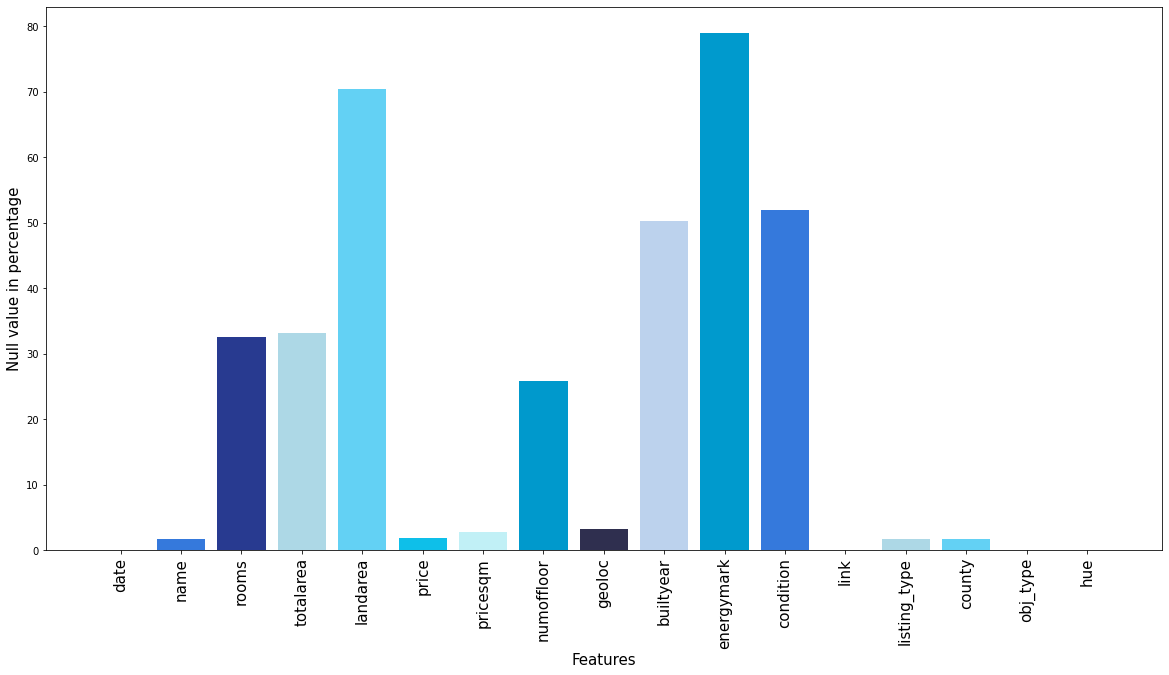

date             0.000000
name             1.794063
rooms           32.505987
totalarea       33.155954
landarea        70.356152
price            1.854879
pricesqm         2.820328
numoffloor      25.827664
geoloc           3.257440
builtyear       50.313581
energymark      78.999582
condition       51.982211
link             0.000000
listing_type     1.794063
county           1.794063
obj_type         0.000000
hue              0.000000
dtype: float64


"\nplt.figure(figsize=(20,10))\nplt.xticks(rotation=90, fontsize=15)\nnull_val=dfs.where(dfs['obj_type']=='apartment').isnull().sum()/dfs.shape[0]*100\nplt.bar(null_val.index, null_val, color=['#009ACD','#3579DC', '#283A90','#ADD8E6', '#63D1F4', '#0EBFE9',   \n                      '#C1F0F6', '#0099CC', '#2F2F4F', '#BCD2ED'])\nplt.xlabel('Features', fontsize=15)\nplt.ylabel('Null value in percentage', fontsize=15)\nplt.show()\n\nprint( null_val)\n"

In [207]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90, fontsize=15)
null_val=dfs.isnull().sum()/dfs.shape[0]*100
plt.bar(null_val.index, null_val, color=['#009ACD','#3579DC', '#283A90','#ADD8E6', '#63D1F4', '#0EBFE9',   
                      '#C1F0F6', '#0099CC', '#2F2F4F', '#BCD2ED'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Null value in percentage', fontsize=15)
plt.show()

print( null_val)

'''
plt.figure(figsize=(20,10))
plt.xticks(rotation=90, fontsize=15)
null_val=dfs.where(dfs['obj_type']=='apartment').isnull().sum()/dfs.shape[0]*100
plt.bar(null_val.index, null_val, color=['#009ACD','#3579DC', '#283A90','#ADD8E6', '#63D1F4', '#0EBFE9',   
                      '#C1F0F6', '#0099CC', '#2F2F4F', '#BCD2ED'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Null value in percentage', fontsize=15)
plt.show()

print( null_val)
'''

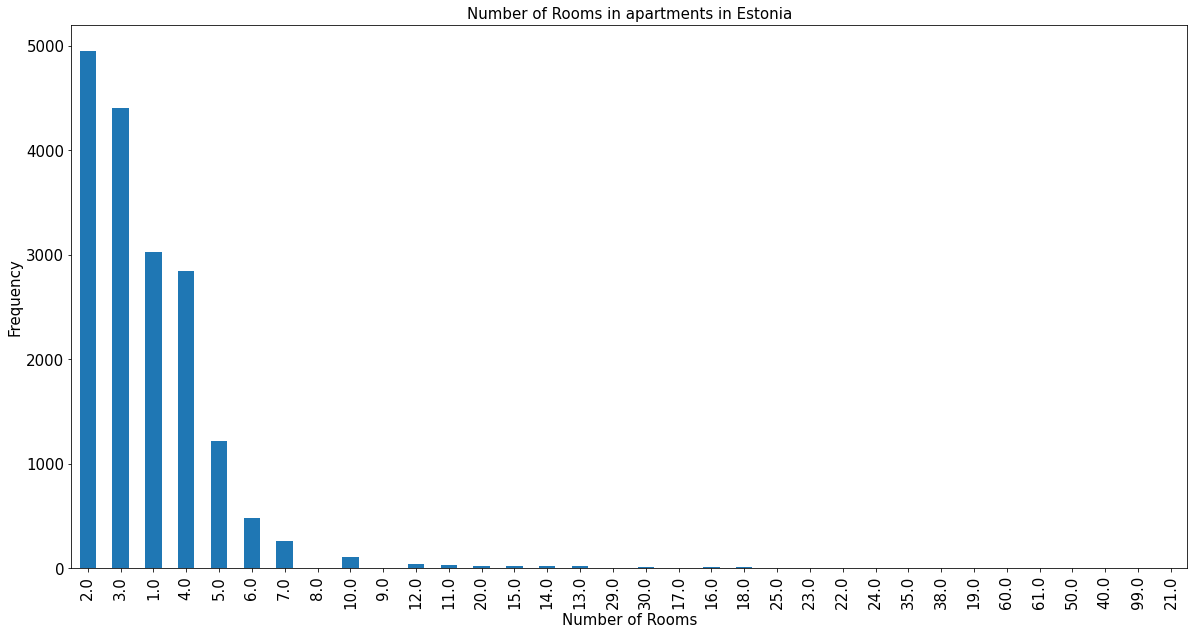

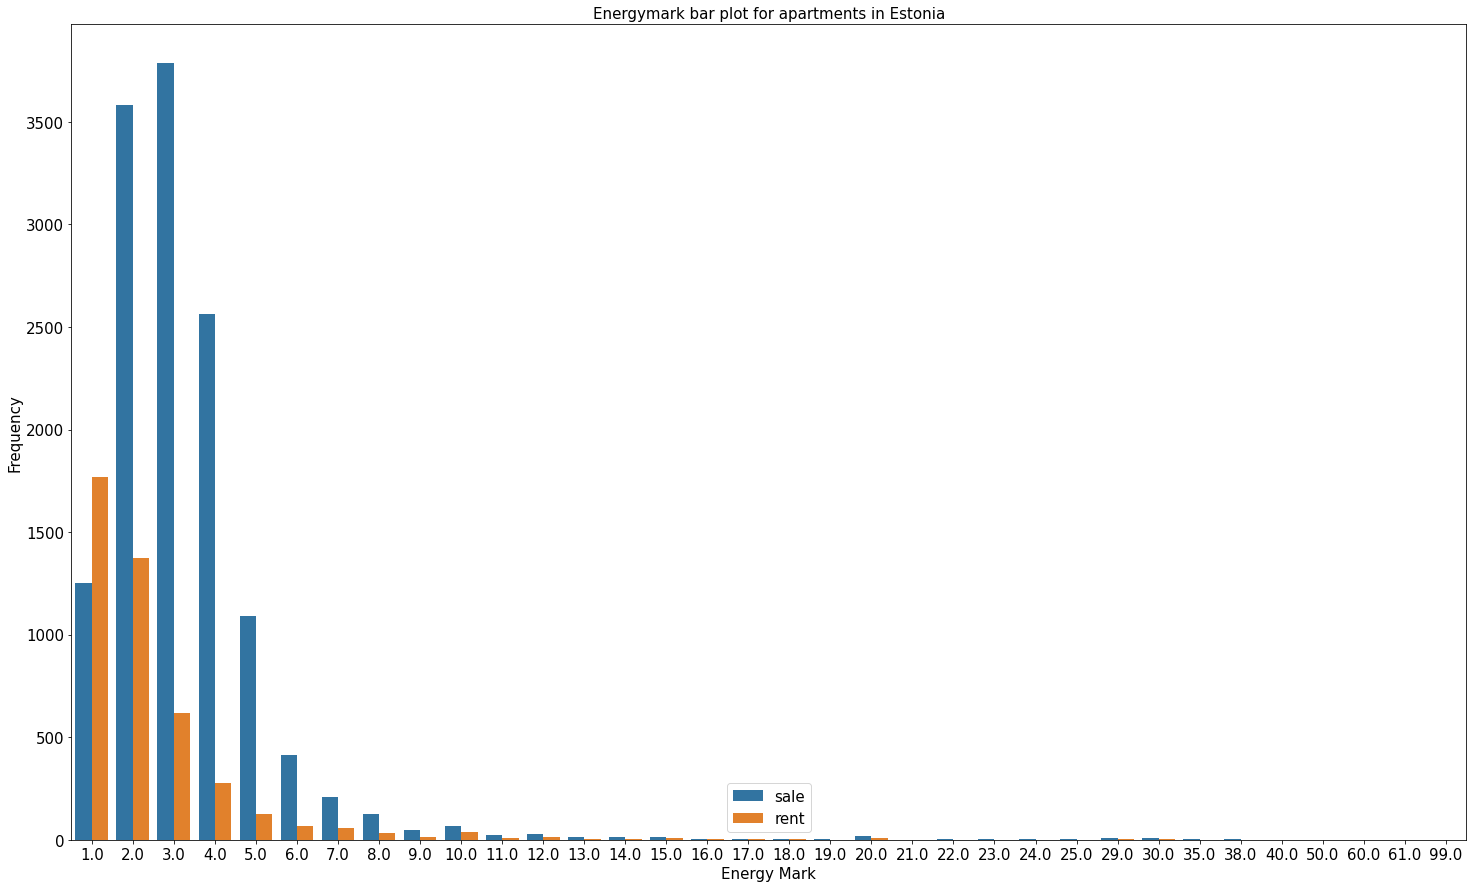

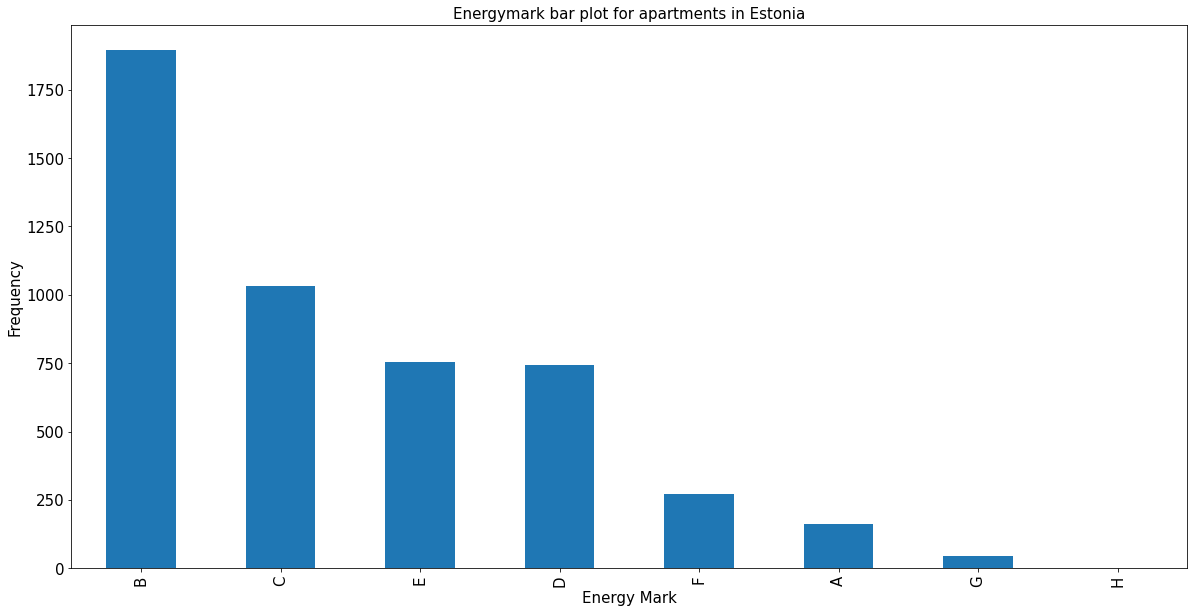

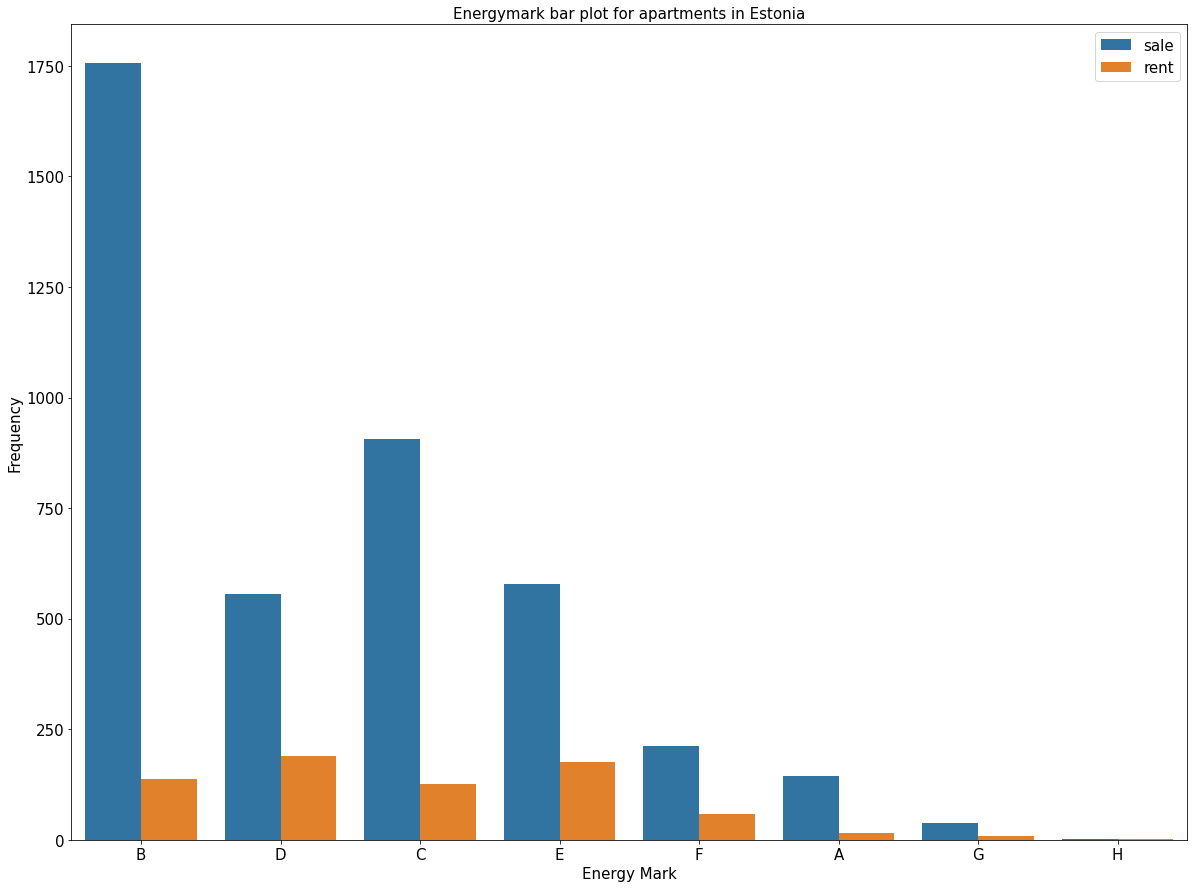

In [187]:
import missingno as msn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


#msn.bar(u_raw)
#msn.heatmap(u_raw) 
# Columns may contain non-numeric values, errors or missing values. Therefore, non-numeric values must be dealt with.
#pd.to_numeric(u_raw['rooms'], errors='coerce').hist(bins=10) # ‘coerce’ -> invalid parsing will be set as NaN


        
ax=dfs['rooms'].value_counts().where(dfs['obj_type']=='apartment').plot(kind='bar', figsize=(20,10), fontsize=15)
plt.title("Number of Rooms in apartments in Estonia", fontsize=15)
ax.set_xlabel("Number of Rooms", fontsize=15)
ax.set_ylabel("Frequency", fontsize=15)
plt.savefig('/home/hasan/statistikaamet/RealEstateProject/Plots/numberofrooms_apt.png')
plt.show()


plt.figure(figsize=(25,15))
ax = sns.countplot(x="rooms", hue="listing_type", data=dfs)
plt.title("Energymark bar plot for apartments in Estonia", fontsize=15)
plt.legend(fontsize=15)
ax.set_xlabel("Energy Mark", fontsize=15)
ax.set_ylabel("Frequency", fontsize=15)
ax.tick_params(labelsize=15)
plt.savefig('/home/hasan/statistikaamet/RealEstateProject/Plots/numberofrooms_apt_rentvssale.png')
plt.show()




dfs_energy=dfs.where(dfs['obj_type']=='apartment')
ax=dfs_energy['energymark'].value_counts().plot(kind='bar', figsize=(20,10), fontsize=15)
plt.title("Energymark bar plot for apartments in Estonia", fontsize=15)
plt.savefig('/home/hasan/statistikaamet/RealEstateProject/Plots/energy_mark_apt.png')
ax.set_xlabel("Energy Mark", fontsize=15)
ax.set_ylabel("Frequency", fontsize=15)
plt.show()

plt.figure(figsize=(20,15))
ax = sns.countplot(x="energymark", hue="listing_type", data=dfs_energy)
plt.title("Energymark bar plot for apartments in Estonia", fontsize=15)
plt.legend(fontsize=15)
ax.set_xlabel("Energy Mark", fontsize=15)
ax.set_ylabel("Frequency", fontsize=15)
ax.tick_params(labelsize=15)
ax.tick_params(labelsize=15)
plt.savefig('/home/hasan/statistikaamet/RealEstateProject/Plots/energy_mark_rentvssale.png')


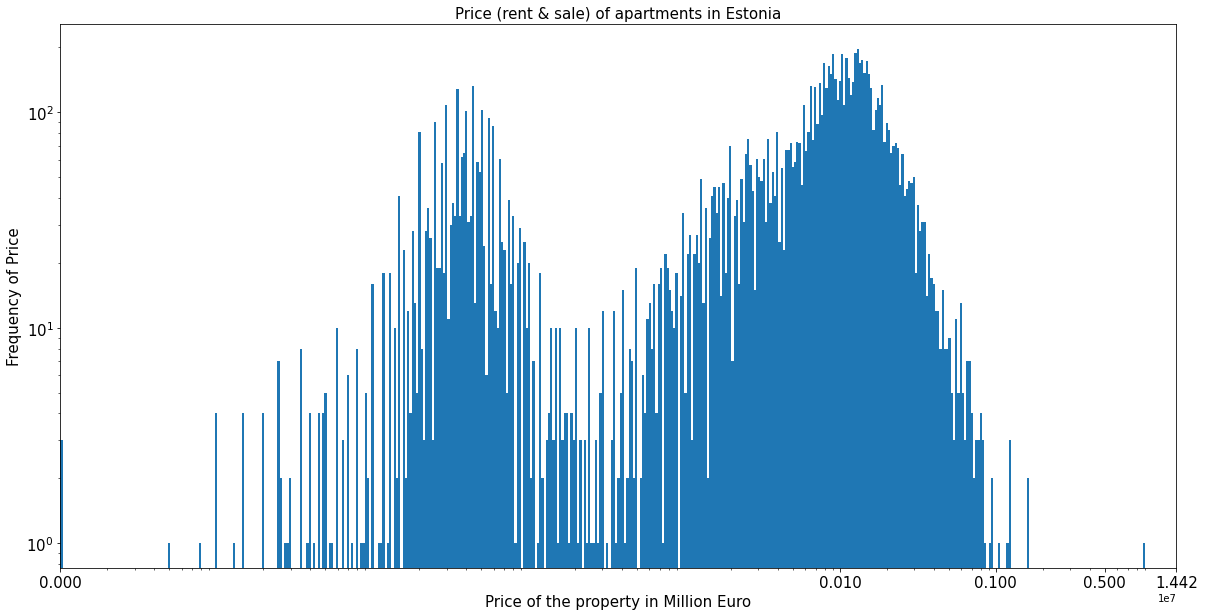

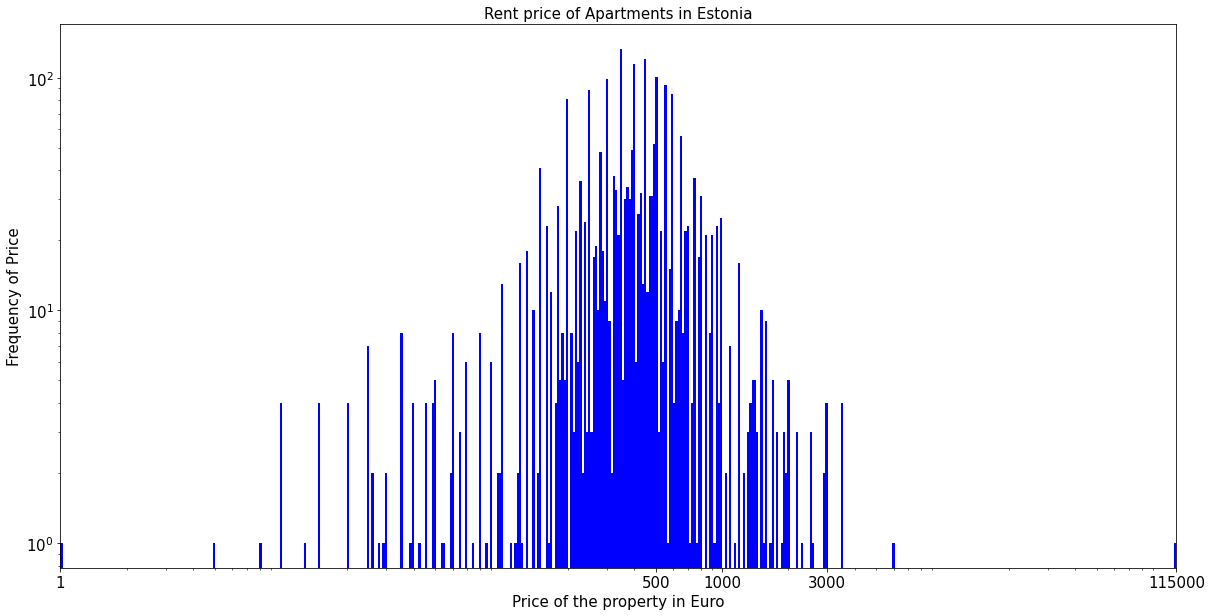

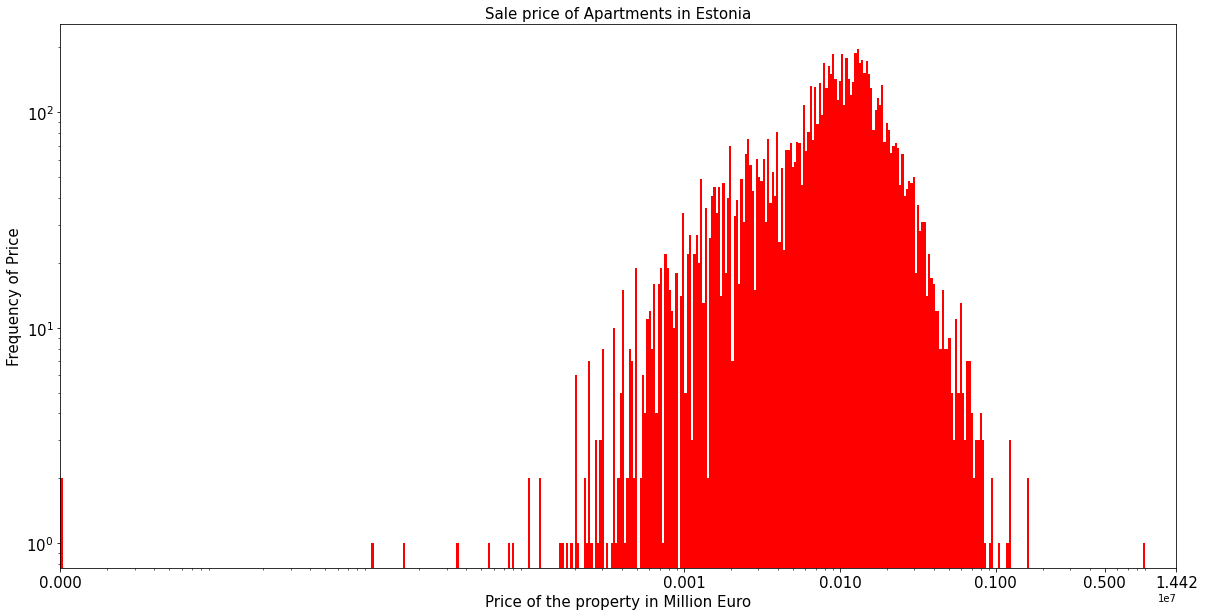

In [343]:
import seaborn as sns
import matplotlib.ticker
plt.figure(figsize=(20,10))
ax=dfs['price'].where(dfs['obj_type']=='apartment').plot(bins=np.logspace(np.log10(dfs.price.where(dfs['obj_type']=='apartment').min()), np.log10(dfs.price.where(dfs['obj_type']=='apartment').max()), 500), kind='hist', loglog=True, xlim=(dfs.price.where(dfs['obj_type']=='apartment').min(),dfs.price.where(dfs['obj_type']=='apartment').max()),fontsize=15)
ax.set_xticks([dfs.price.where(dfs['obj_type']=='apartment').min(), 100000, 1000000, 5000000, dfs.price.where(dfs['obj_type']=='apartment').max()])
plt.ylabel("Frequency of Price", fontsize=15)
plt.xlabel("Price of the property in Million Euro", fontsize=15)
plt.title('Price (rent & sale) of apartments in Estonia', fontsize=15)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.savefig('/home/hasan/statistikaamet/RealEstateProject/Plots/apt_price.png')
plt.show()

print()

dfs_apt=dfs.where(dfs['obj_type']=='apartment')
plt.figure(figsize=(20,10))
ax=dfs_apt['price'].where(dfs['listing_type']=='rent').plot(bins=np.logspace(np.log10(dfs_apt.price.where(dfs_apt['listing_type']=='rent').min()), np.log10(dfs_apt.price.where(dfs_apt['listing_type']=='rent').max()), 500), kind='hist', loglog=True, xlim=(dfs_apt.price.where(dfs_apt['listing_type']=='rent').min(),dfs_apt.price.where(dfs_apt['listing_type']=='rent').max()),fontsize=15, color='blue')
ax.set_xticks([dfs_apt.price.where(dfs_apt['listing_type']=='rent').min(), 500, 1000, 3000, dfs_apt.price.where(dfs['listing_type']=='rent').max()])
plt.ylabel("Frequency of Price", fontsize=15)
plt.xlabel("Price of the property in Euro", fontsize=15)
plt.title('Rent price of Apartments in Estonia', fontsize=15)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.savefig('/home/hasan/statistikaamet/RealEstateProject/Plots/rent_price_apt.png')
plt.show()


#dfs_apt=dfs.where(dfs['obj_type']=='apartment')
plt.figure(figsize=(20,10))
ax1=dfs_apt['price'].where(dfs['listing_type']=='sale').plot(bins=np.logspace(np.log10(dfs_apt.price.where(dfs_apt['listing_type']=='sale').min()), np.log10(dfs_apt.price.where(dfs_apt['listing_type']=='sale').max()), 500), kind='hist', loglog=True, xlim=(dfs_apt.price.where(dfs_apt['listing_type']=='sale').min(),dfs_apt.price.where(dfs_apt['listing_type']=='sale').max()),fontsize=15, color='red')
ax1.set_xticks([dfs_apt.price.where(dfs_apt['listing_type']=='sale').min(), 10000, 100000, 1000000, 5000000, dfs_apt.price.where(dfs['listing_type']=='sale').max()])
plt.ylabel("Frequency of Price", fontsize=15)
plt.xlabel("Price of the property in Million Euro", fontsize=15)
plt.title('Sale price of Apartments in Estonia', fontsize=15)
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.savefig('/home/hasan/statistikaamet/RealEstateProject/Plots/sale_price_apt.png')
plt.show()



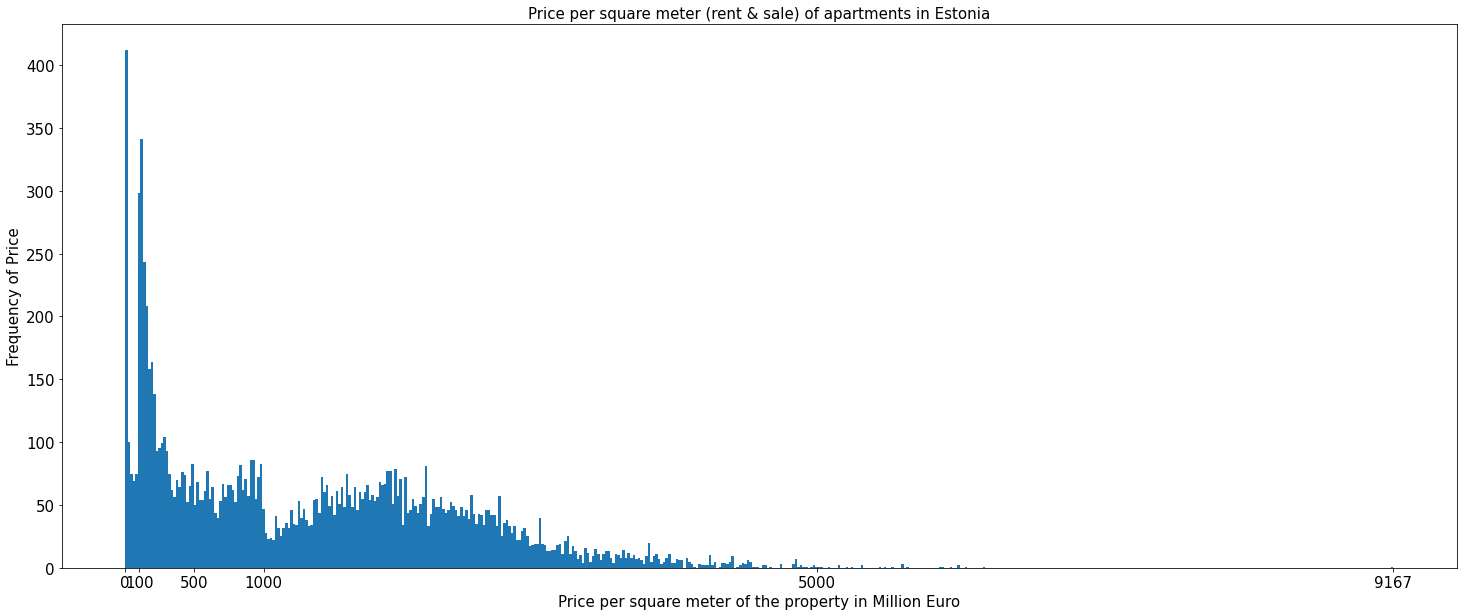

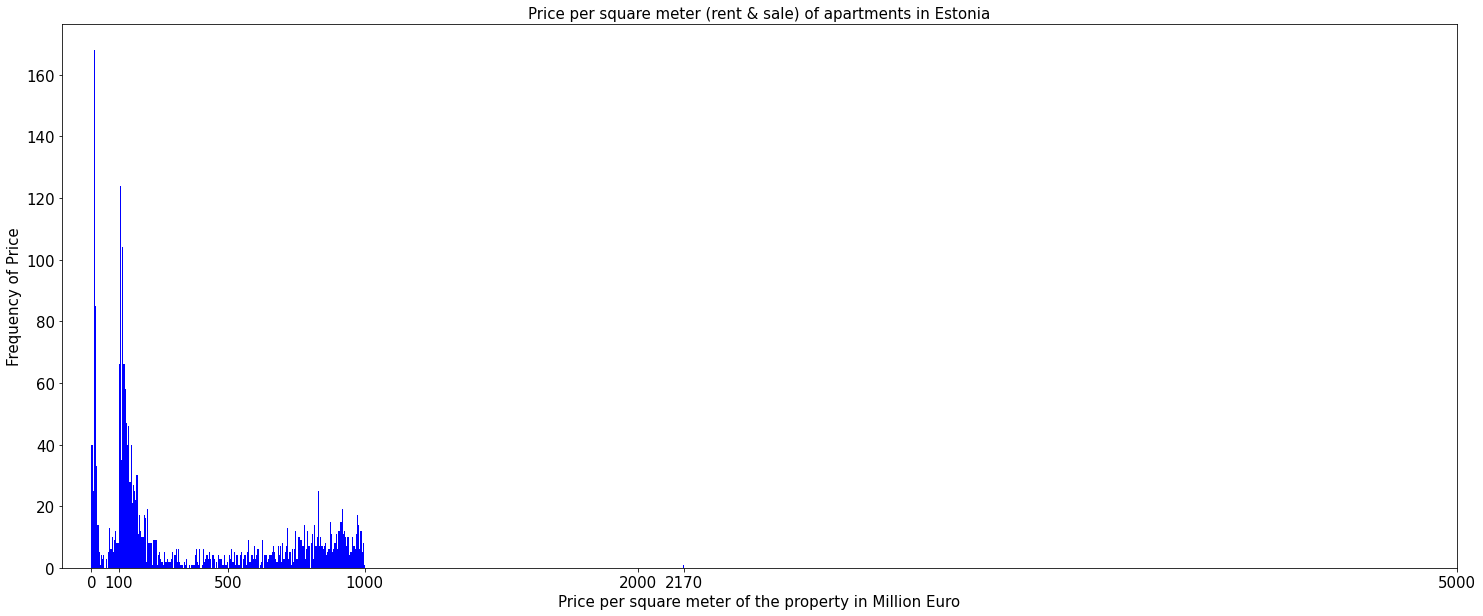

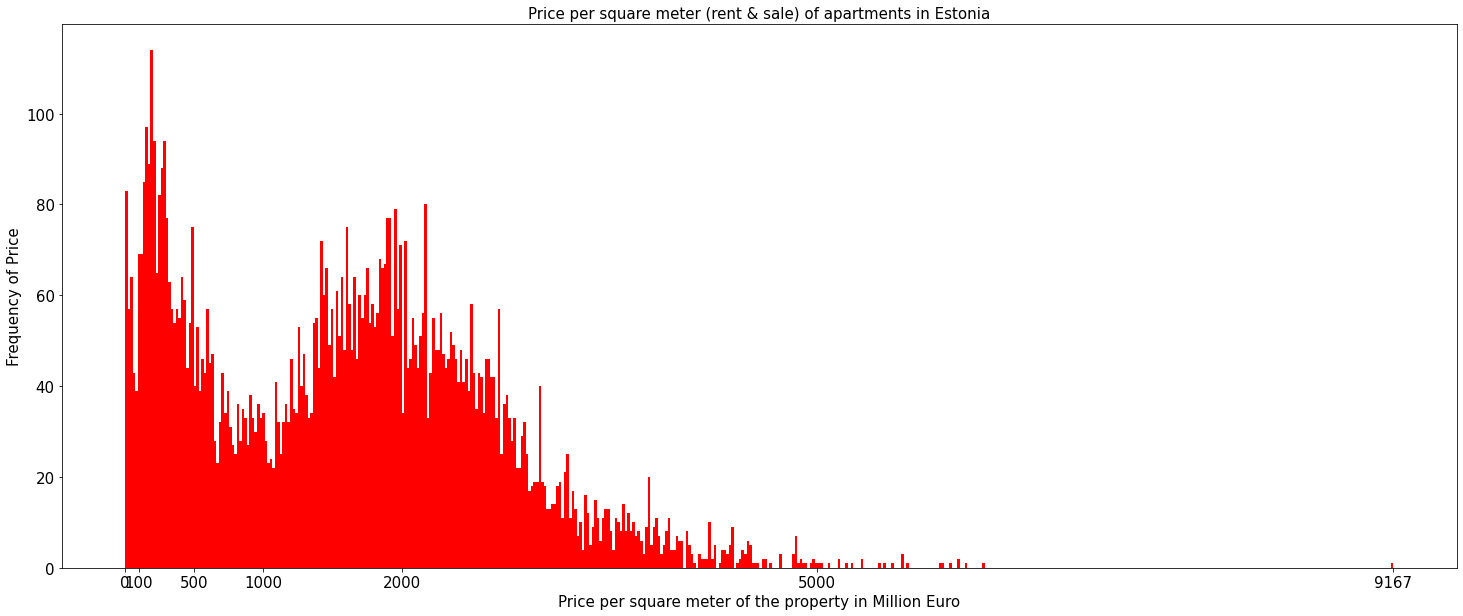

In [316]:
#print(dfs_apt.pricesqm.max())
plt.figure(figsize=(25,10))
ax = dfs_apt.pricesqm.plot.hist(bins= 500,fontsize=15)
ax.set_xticks([dfs_apt.pricesqm.min(), 100, 500, 1000, 5000, dfs_apt.pricesqm.max()])
plt.ylabel("Frequency of Price", fontsize=15)
plt.xlabel("Price per square meter of the property in Million Euro", fontsize=15)
plt.title('Price per square meter (rent & sale) of apartments in Estonia', fontsize=15)
plt.savefig('/home/hasan/statistikaamet/RealEstateProject/Plots/pricesqm_apt.png')
plt.show()


plt.figure(figsize=(25,10))
ax = dfs_apt.pricesqm.where(dfs['listing_type']=='rent').plot.hist(bins=500, alpha=1.0, fontsize=15, color='blue')
ax.set_xticks([dfs_apt.pricesqm.where(dfs['listing_type']=='rent').min(), 100, 500, 1000, 2000, 5000, dfs_apt.pricesqm.where(dfs['listing_type']=='rent').max()])
plt.ylabel("Frequency of Price", fontsize=15)
plt.xlabel("Price per square meter of the property in Million Euro", fontsize=15)
plt.title('Price per square meter (rent & sale) of apartments in Estonia', fontsize=15)
plt.savefig('/home/hasan/statistikaamet/RealEstateProject/Plots/rent_pricesqm_apt.png')
plt.show()

plt.figure(figsize=(25,10))
ax = dfs_apt.pricesqm.where(dfs['listing_type']=='sale').plot.hist(bins=500, alpha=1.0, fontsize=15, color='red')
ax.set_xticks([dfs_apt.pricesqm.where(dfs['listing_type']=='sale').min(), 100, 500, 1000, 2000, 5000, dfs_apt.pricesqm.where(dfs['listing_type']=='sale').max()])
plt.ylabel("Frequency of Price", fontsize=15)
plt.xlabel("Price per square meter of the property in Million Euro", fontsize=15)
plt.title('Price per square meter (rent & sale) of apartments in Estonia', fontsize=15)
plt.savefig('/home/hasan/statistikaamet/RealEstateProject/Plots/sale_pricesqm_apt.png')
plt.show()

In [355]:
#xy=dfs_apt.builtyear.nlargest(1)
#dfs_apt=dfs_apt[~dfs_apt.builtyear.isin(xy.values)]

xy=dfs_apt.builtyear.nsmallest(8)
dfs_apt=dfs_apt[~dfs_apt.builtyear.isin(xy.values)]



print(dfs_apt.builtyear.nlargest(10))

7063     2022.0
21384    2022.0
5        2021.0
6        2021.0
7        2021.0
61       2021.0
78       2021.0
97       2021.0
99       2021.0
164      2021.0
Name: builtyear, dtype: float64


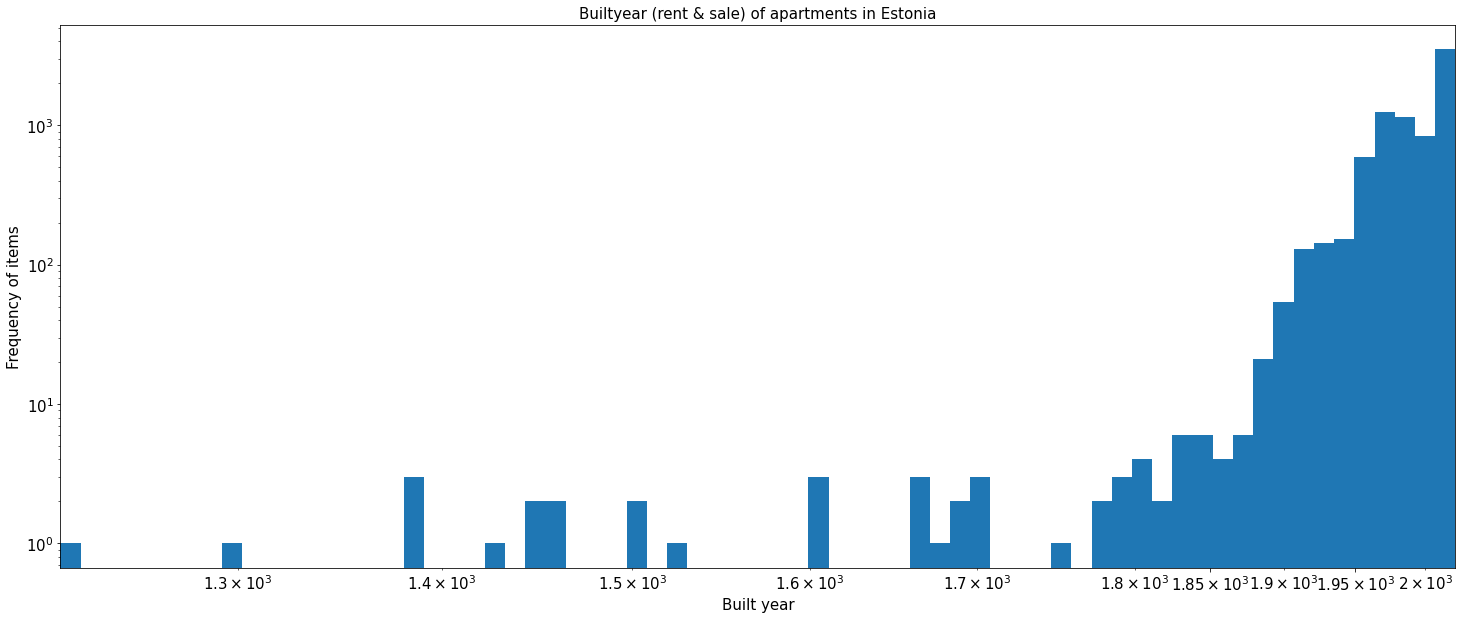

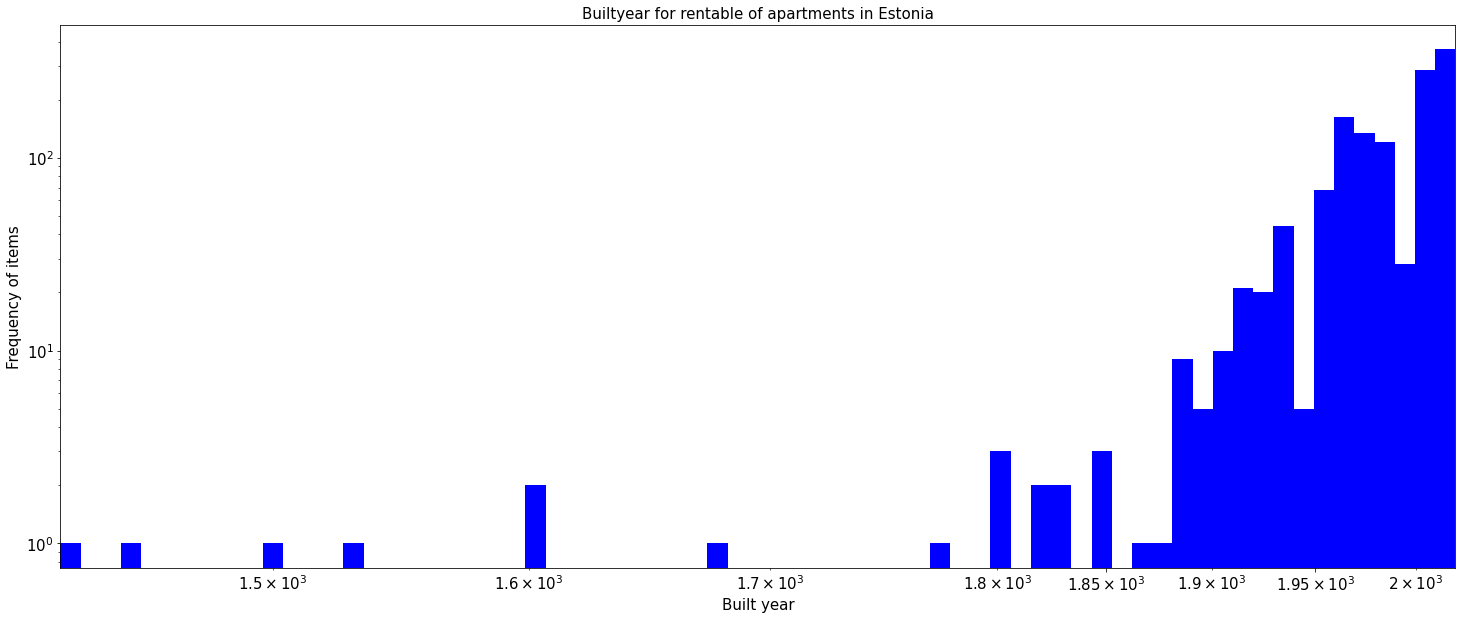

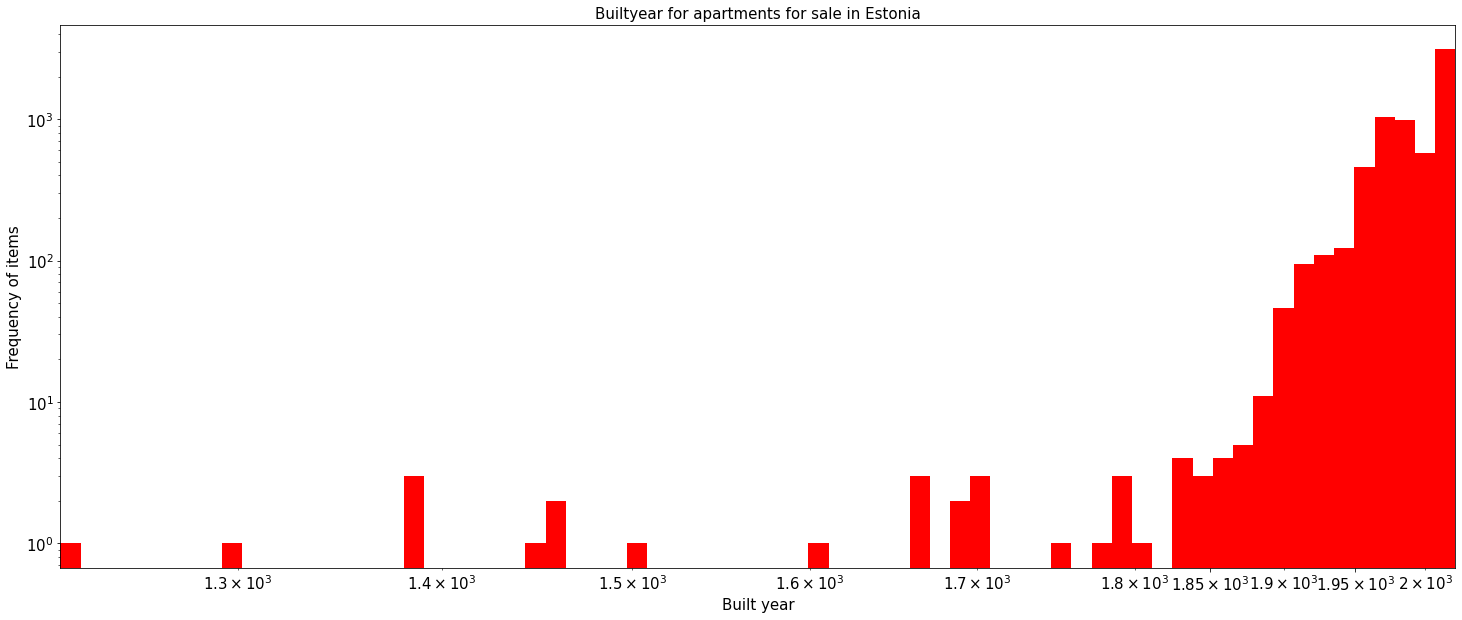

In [362]:
#print(dfs_apt.pricesqm.max())

plt.figure(figsize=(25,10))
ax = dfs_apt.builtyear.plot.hist(bins=np.logspace(np.log10(dfs_apt.builtyear.min()), np.log10(dfs_apt.builtyear.max()), 70),loglog=True, xlim=(dfs_apt.builtyear.min(),dfs_apt.builtyear.max()),fontsize=15)
ax.set_xticks([ 1850, 1950])
#ax.set_xticks([ 1400, 1800, 1900, 2000, 2010, 2020, 2030])
plt.ylabel("Frequency of items", fontsize=15)
plt.xlabel("Built year", fontsize=15)
plt.title('Builtyear (rent & sale) of apartments in Estonia', fontsize=15)
plt.savefig('/home/hasan/statistikaamet/RealEstateProject/Plots/builtyear_apt.png')
plt.show()


plt.figure(figsize=(25,10))
ax = dfs_apt.builtyear.where(dfs['listing_type']=='rent').plot.hist(bins=np.logspace(np.log10(dfs_apt.builtyear.where(dfs['listing_type']=='rent').min()), np.log10(dfs_apt.builtyear.where(dfs['listing_type']=='rent').max()), 70),loglog=True, xlim=(dfs_apt.builtyear.where(dfs['listing_type']=='rent').min(),dfs_apt.builtyear.where(dfs['listing_type']=='rent').max()),fontsize=15, color='blue')
ax.set_xticks([ 1850, 1950])
#ax.set_xticks([ 1400, 1800, 1900, 2000, 2010, 2020, 2030])
plt.ylabel("Frequency of items", fontsize=15)
plt.xlabel("Built year", fontsize=15)
plt.title('Builtyear for rentable of apartments in Estonia', fontsize=15)
plt.savefig('/home/hasan/statistikaamet/RealEstateProject/Plots/builtyear_rent_apt.png')
plt.show()


plt.figure(figsize=(25,10))
ax = dfs_apt.builtyear.where(dfs['listing_type']=='sale').plot.hist(bins=np.logspace(np.log10(dfs_apt.builtyear.where(dfs['listing_type']=='sale').min()), np.log10(dfs_apt.builtyear.where(dfs['listing_type']=='sale').max()), 70),loglog=True, xlim=(dfs_apt.builtyear.where(dfs['listing_type']=='sale').min(),dfs_apt.builtyear.where(dfs['listing_type']=='sale').max()),fontsize=15, color='red')
ax.set_xticks([ 1850, 1950])
#ax.set_xticks([ 1400, 1800, 1900, 2000, 2010, 2020, 2030])
plt.ylabel("Frequency of items", fontsize=15)
plt.xlabel("Built year", fontsize=15)
plt.title('Builtyear for apartments for sale in Estonia', fontsize=15)
plt.savefig('/home/hasan/statistikaamet/RealEstateProject/Plots/builtyear_sale_apt.png')
plt.show()



**********Display 10 largest value of Total Area**********
2290     3.920100e+11
17283    3.680200e+11
9698     5.810000e+05
22360    3.768000e+05
23983    3.432000e+05
17084    2.887550e+05
7208     2.400000e+05
14064    1.895350e+05
8023     1.730000e+05
17203    1.600000e+05
Name: totalarea, dtype: float64
**********Scatter plot before data cleaning**********


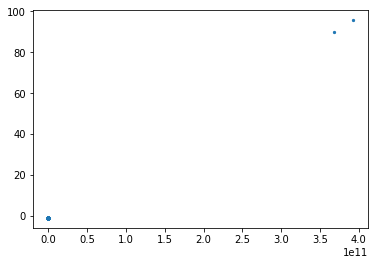

**********Scatter plot after data cleaning**********


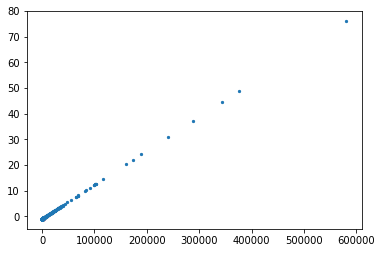

**********Standard deviation highest 30 values**********

**********Standard deviation lowest 60 values**********
**********Scatter plot after further data cleaning**********


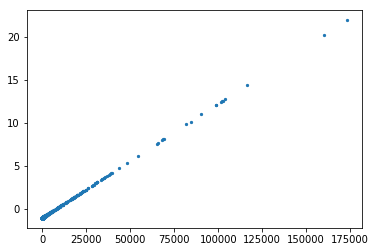


RES FURTHER 3610.886418962003


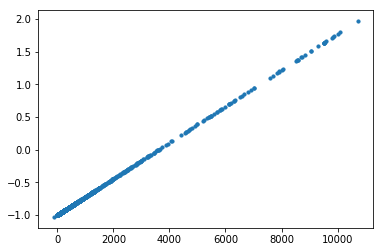

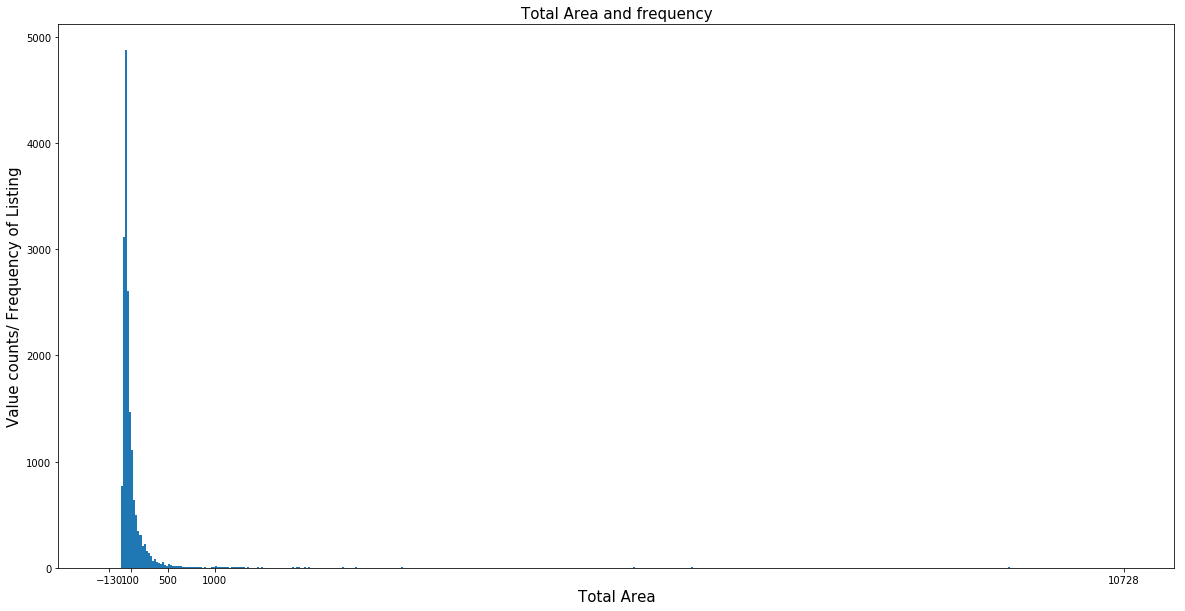

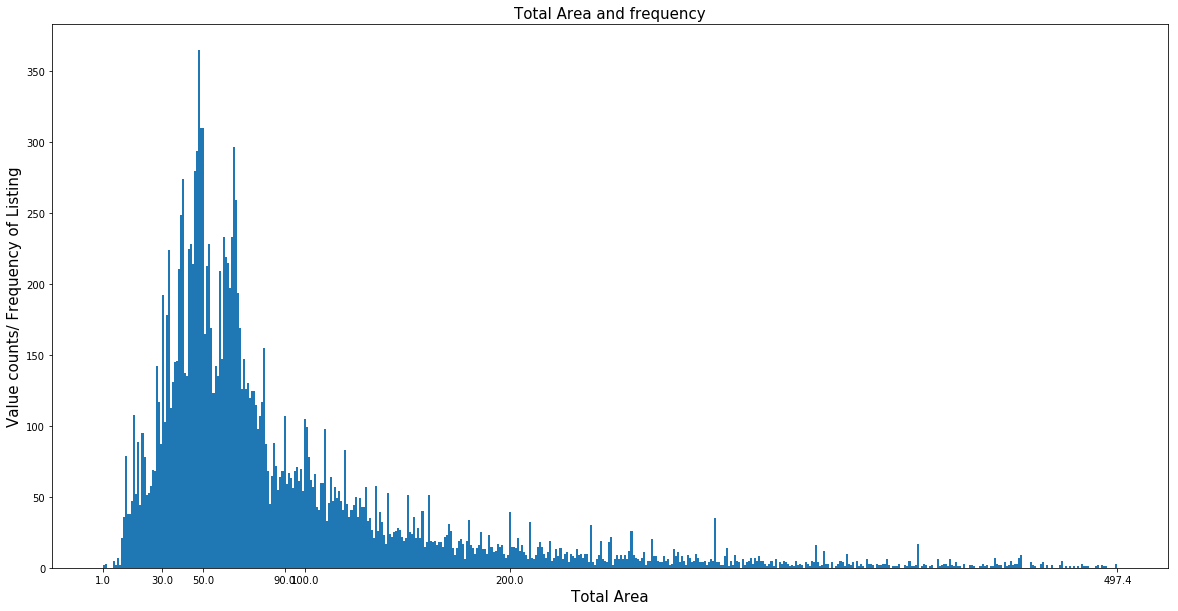

In [19]:
#print(u_raw.nlargest(10,'totalarea'))
#mask=u_raw.index(u_raw.totalarea.max())
#mask=mask.totalarea>1
#print(mask)
#res = u_raw[~mask]
print("**********Display 10 largest value of Total Area**********")
print(u_raw.totalarea.nlargest(10))


'''
#print(xy.values)
res=u_raw[~u_raw.totalarea.isin(xy.values)]
res.head(10)   
std=res.totalarea.std()
y=(res.totalarea/std)-1
'''
print("**********Scatter plot before data cleaning**********")
std=u_raw.totalarea.std()
std_TA=(u_raw.totalarea/std)-1
#plt.figure(figsize=(20,10))
plt.scatter(x=u_raw.totalarea,y=std_TA, s=5)
plt.savefig('/home/hasan/statistikaamet/RealEstateProject/Plots/std_ta.png')
plt.show()




print("**********Scatter plot after data cleaning**********")
xy=u_raw.totalarea.nlargest(2)
res=u_raw[~u_raw.totalarea.isin(xy.values)]
std_res=res.totalarea.std()

std_res_norm=(res.totalarea/std_res)-1


plt.scatter(x=res.totalarea,y=std_res_norm, s=5)
plt.savefig('/home/hasan/statistikaamet/RealEstateProject/Plots/std_after.png')
plt.show()

print("**********Standard deviation highest 30 values**********")
#print(std_res_norm.nlargest(10))
print()
print("**********Standard deviation lowest 60 values**********")
#print(std_res_norm.nsmallest(10))

#print("Standard Deviation")
#print(std_res)



print("**********Scatter plot after further data cleaning**********")
xy=res.totalarea.nlargest(6)

res_further=res[~res.totalarea.isin(xy.values)]
#std_res_further=res_further.totalarea.std()

std_res_norm_f=(res_further.totalarea/std_res)-1


plt.scatter(x=res_further.totalarea,y=std_res_norm_f, s=5)
plt.savefig('/home/hasan/statistikaamet/RealEstateProject/Plots/std_after_further.png')
plt.show()
print()
#print(std_res_norm_f.nlargest(50))
print("RES FURTHER", res_further.totalarea.std())

#print(u_raw.totalarea.std())
res_land=u_raw[((u_raw.totalarea/res_further.totalarea.std())-1)>2]
res_apt=u_raw[~(((u_raw.totalarea/res_further.totalarea.std())-1)>2)]

plt.scatter(x=res_apt.totalarea,y=(res_apt.totalarea/res_further.totalarea.std())-1, s=10)
plt.savefig('/home/hasan/statistikaamet/RealEstateProject/Plots/std_apt.png')
plt.show()


plt.figure(figsize=(20,10))
plt.xlabel("Total Area", fontsize=15)
plt.ylabel("Value counts/ Frequency of Listing", fontsize=15)
plt.title('Total Area and frequency', fontsize=15)
plt.hist(res_apt.totalarea.dropna(), bins=500)
plt.xticks([res_apt.totalarea.min(), 100, 500, 1000, res_apt.totalarea.max()])
plt.savefig('/home/hasan/statistikaamet/RealEstateProject/Plots/std_apt_hist.png')
plt.show()


res_apt_new=res_apt[res_apt.totalarea<500]
res_apt_new=res_apt_new[res_apt_new.totalarea>0]


plt.figure(figsize=(20,10))
plt.xlabel("Total Area", fontsize=15)
plt.ylabel("Value counts/ Frequency of Listing", fontsize=15)
plt.title('Total Area and frequency', fontsize=15)
plt.hist(res_apt_new.totalarea, bins=500)
plt.xticks([res_apt_new.totalarea.min(), 30, 50, 90, 100, 200, res_apt_new.totalarea.max()])
plt.savefig('/home/hasan/statistikaamet/RealEstateProject/Plots/std_apt_hist_500.png')
plt.show()


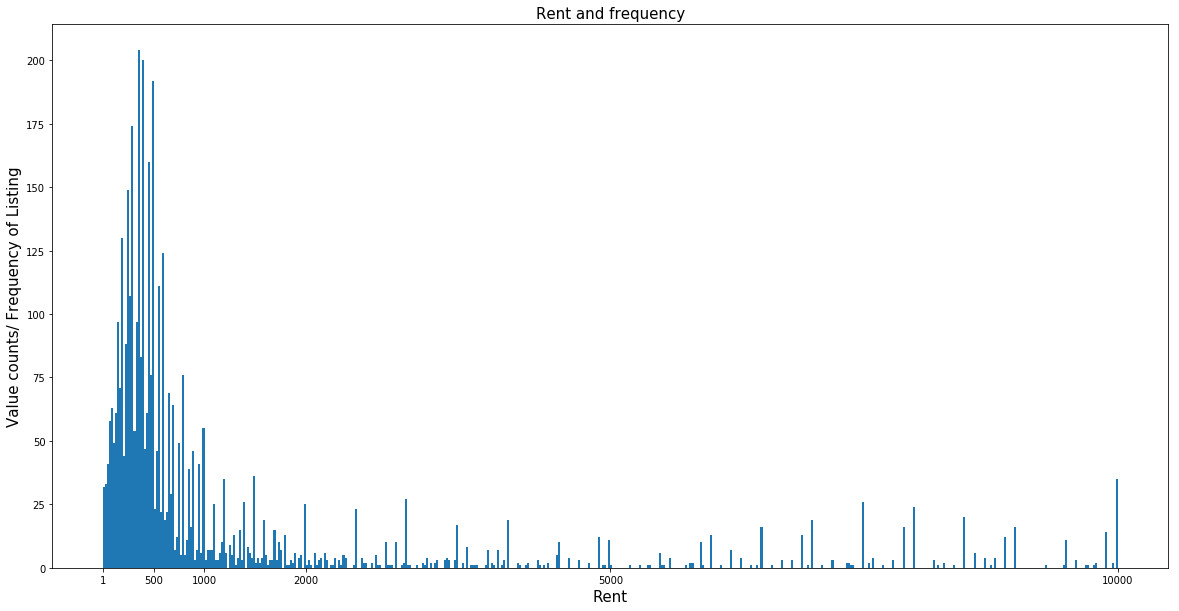

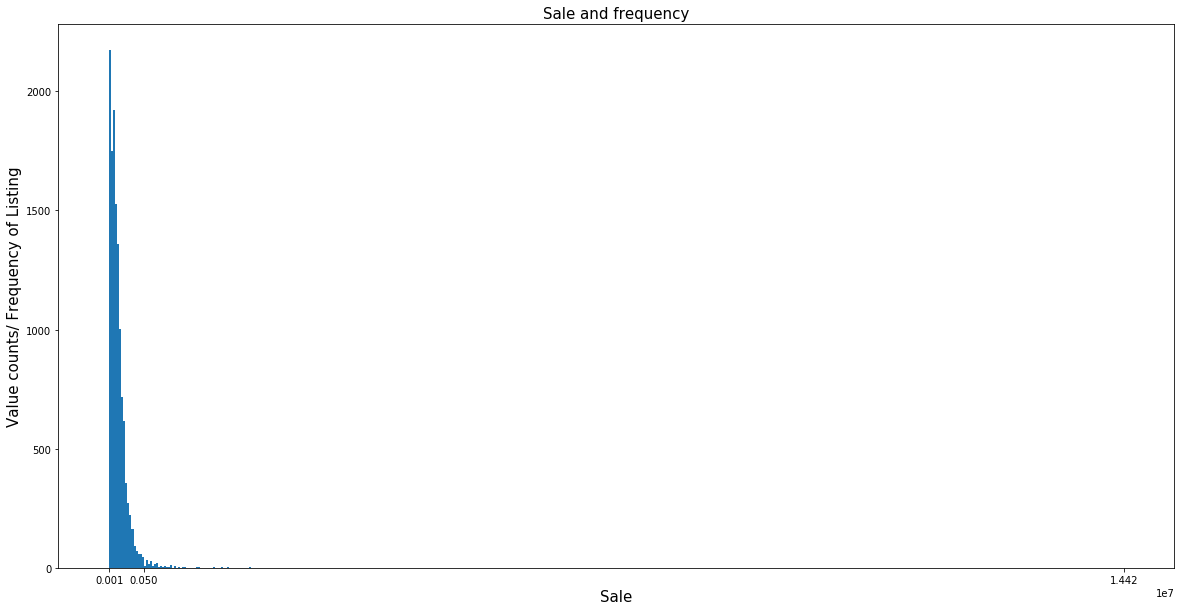

In [22]:
mask = (res_apt_new.price>10000)
sale_apt=res_apt_new[mask]
rent_apt=res_apt_new[~mask]



plt.figure(figsize=(20,10))
plt.xlabel("Rent", fontsize=15)
plt.ylabel("Value counts/ Frequency of Listing", fontsize=15)
plt.title('Rent and frequency', fontsize=15)
plt.hist(rent_apt.price.dropna(), bins=500)
plt.xticks([rent_apt.price.min(), 500, 1000,2000, 5000, rent_apt.price.max()])
plt.savefig('/home/hasan/statistikaamet/RealEstateProject/Plots/std_apt_hist_rent.png')
plt.show()


plt.figure(figsize=(20,10))
plt.xlabel("Sale", fontsize=15)
plt.ylabel("Value counts/ Frequency of Listing", fontsize=15)
plt.title('Sale and frequency', fontsize=15)
plt.hist(sale_apt.price.dropna(), bins=500)
plt.xticks([sale_apt.price.min(), 500000, sale_apt.price.max()])
plt.savefig('/home/hasan/statistikaamet/RealEstateProject/Plots/std_apt_hist_sale.png')
plt.show()

In [23]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

profile = ProfileReport(res, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [9]:
profile.to_widgets()